<a href="https://colab.research.google.com/github/JOCRZ/Data-Science-Diploma/blob/main/DigitClassification(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classifiaction Using ANN
Multi-classification Problem

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


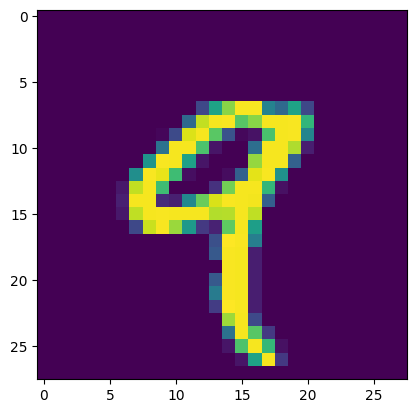

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])

single array value range from 0 to 255. so what we have to do is bring the value between 0 and 1. This will help neural network to converge fastly. it is import to note that values should be similar range.

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu')) # don't have to specify the input because flatten output value wll give away
model.add(Dense(10,activation='softmax')) # softmax because of mult-classification

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.1319 - val_accuracy: 0.9768
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.1255 - val_accuracy: 0.9776
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.1539 - val_accuracy: 0.9722
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.1511 - val_accuracy: 0.9752
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.1447 - val_accuracy: 0.9766
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1365 - val_accuracy: 0.9783
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1709 - val_accuracy:

In [23]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [24]:
y_pred = y_prob.argmax(axis=1)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9751

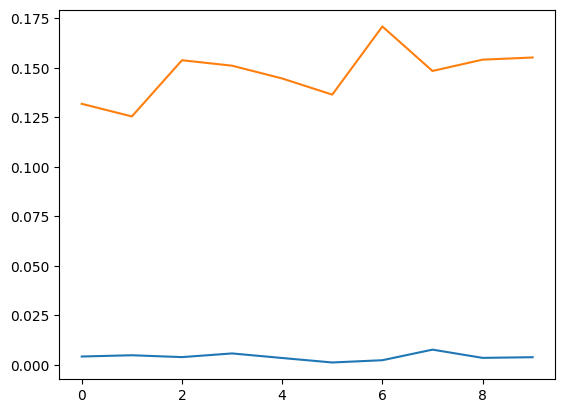

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

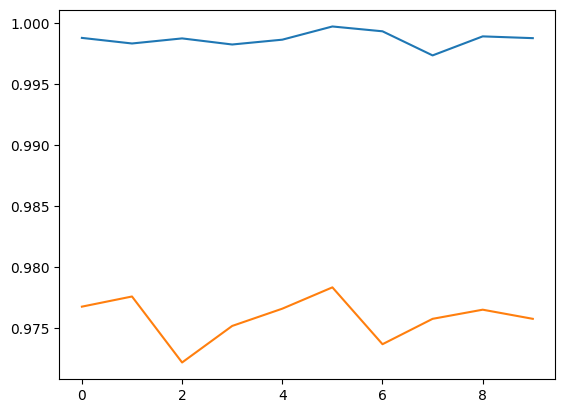

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

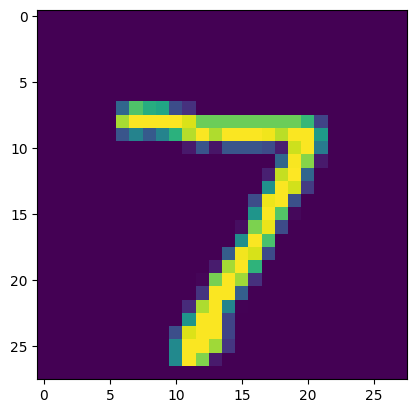

In [28]:
plt.imshow(X_test[0])

In [30]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)[0]

1/1 [==============================] - 0s 17ms/step


7